In [4]:
from google.colab import files
uploaded = files.upload()


Saving car data.csv to car data.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [5]:
df = pd.read_csv('car data.csv')  # Change the filename if needed
df.head()


,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [6]:
df.info()
df.describe()
df.isnull().sum()
df.columns


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [7]:
# Drop 'Car_Name' as it's not useful for prediction
df = df.drop(['Car_Name'], axis=1)

# Create a new feature for car age
df['Car_Age'] = 2025 - df['Year']
df.drop(['Year'], axis=1, inplace=True)

# Convert categorical columns to numerical using one-hot encoding
df = pd.get_dummies(df, drop_first=True)

df.head()


,Selling_Price,Present_Price,Kms_Driven,Owner,Car_Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,11,False,True,False,True
1,4.75,9.54,43000,0,12,True,False,False,True
2,7.25,9.85,6900,0,8,False,True,False,True
3,2.85,4.15,5200,0,14,False,True,False,True
4,4.60,6.87,42450,0,11,True,False,False,True


In [8]:
X = df.drop(['Selling_Price'], axis=1)
y = df['Selling_Price']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [9]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

y_pred_lr = lr_model.predict(X_test)

# Evaluation
print("Linear Regression R2 Score:", r2_score(y_test, y_pred_lr))


Linear Regression R2 Score: 0.848981302489908


In [10]:
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

# Evaluation
print("Random Forest R2 Score:", r2_score(y_test, y_pred_rf))


Random Forest R2 Score: 0.9582290197846571


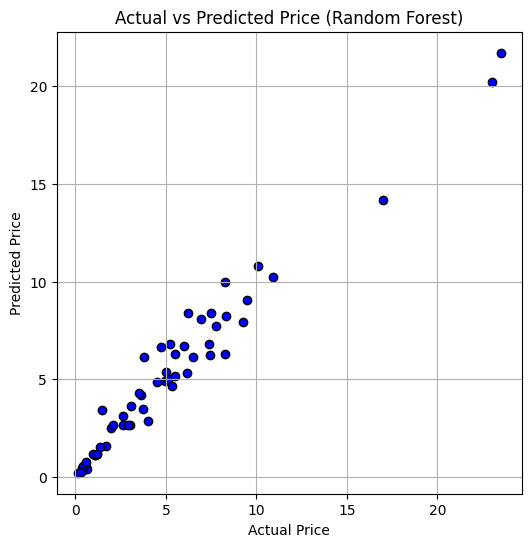

In [11]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_rf, color='blue', edgecolor='k')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Price (Random Forest)")
plt.grid(True)
plt.show()


In [12]:
import pickle
pickle.dump(rf_model, open('car_price_model.pkl', 'wb'))


In [13]:
files.download('car_price_model.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

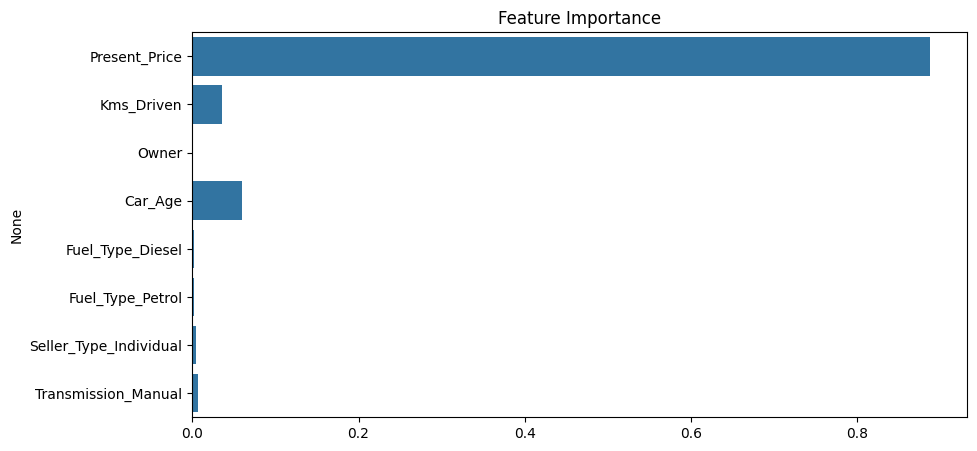

In [14]:
importances = rf_model.feature_importances_
features = X.columns

plt.figure(figsize=(10,5))
sns.barplot(x=importances, y=features)
plt.title("Feature Importance")
plt.show()
